In [3]:
!mkdir -p ~/.Kaggle
!cp kaggle.json ~/.Kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:05<00:00, 208MB/s]
100% 1.06G/1.06G [00:05<00:00, 219MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [7]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r'/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def process(image,label):
    image = tf.cast(image/255., tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
#CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3), padding='valid',activation='relu',input_shape =(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size =(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size =(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.5501 - loss: 0.7424 - val_accuracy: 0.6830 - val_loss: 0.5868
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7028 - loss: 0.5684 - val_accuracy: 0.7690 - val_loss: 0.4918
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 73ms/step - accuracy: 0.7871 - loss: 0.4473 - val_accuracy: 0.8002 - val_loss: 0.4594
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 66ms/step - accuracy: 0.8577 - loss: 0.3296 - val_accuracy: 0.7962 - val_loss: 0.5462
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.9188 - loss: 0.1934 - val_accuracy: 0.7784 - val_loss: 0.7941
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.9571 - loss: 0.1089 - val_accuracy: 0.7950 - val_loss: 0.9752
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 73ms/step - accuracy: 0.9733 - loss: 0.0758 - val_accuracy: 0.7986 - val_loss: 1.0174
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9840 - loss: 0.0488 - 

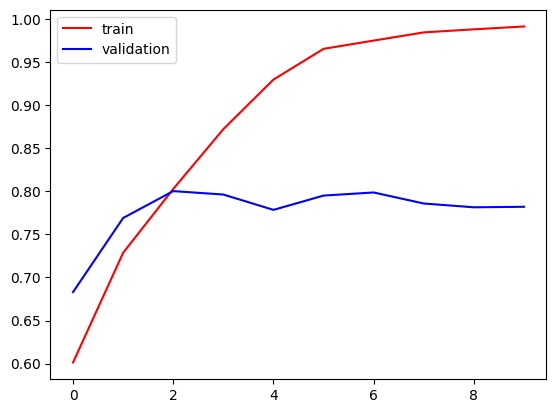

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color ='red', label ='train')
plt.plot(history.history['val_accuracy'], color ='blue', label = 'validation')
plt.legend()

In [17]:
# Optimizing and increasing model's accuracy

- Early Stopping
- Normalizing input (already done)
- Dropout layers
- Regularization
- keras tuner for optimizers

In [30]:
from keras.layers import Dropout
import keras_tuner
def build_model(hp):
  model = Sequential()

  model.add(Conv2D(32,kernel_size =(3,3), padding='valid',activation='relu',input_shape =(256,256,3)))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
  units = hp.Float("units", min_value = 0.2,max_value = 0.8, step = 0.15)
  model.add(Dropout(units))

  model.add(Conv2D(64,kernel_size =(3,3), padding='valid',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
  model.add(Dropout(units))

  model.add(Conv2D(128,kernel_size =(3,3), padding='valid',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
  model.add(Dropout(units))

  model.add(Flatten())

  model.add(Dense(128,activation='relu'))
  model.add(Dropout(units))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])
  return model

In [31]:
tuner = keras_tuner.RandomSearch(build_model,
                                 objective='val_accuracy',
                                 max_trials = 4,
                                 directory = "kerastuner_storage",
                                 project_name = "dog_cat_classification")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
tuner.search(train_ds,epochs=5, validation_data=validation_ds)

Trial 4 Complete [00h 05m 12s]
val_accuracy: 0.7361999750137329

Best val_accuracy So Far: 0.7373999953269958
Total elapsed time: 00h 18m 55s


In [33]:
tuner.get_best_hyperparameters()[0].values

{'units': 0.2}

In [34]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
history = model.fit(train_ds,epochs=10, validation_data=validation_ds,initial_epoch=5)

Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - accuracy: 0.8067 - loss: 0.4306 - val_accuracy: 0.7420 - val_loss: 0.5670
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 73ms/step - accuracy: 0.8522 - loss: 0.3446 - val_accuracy: 0.7410 - val_loss: 0.7015
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 69ms/step - accuracy: 0.8945 - loss: 0.2546 - val_accuracy: 0.7512 - val_loss: 0.7231
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 79ms/step - accuracy: 0.9214 - loss: 0.1976 - val_accuracy: 0.7458 - val_loss: 0.8231
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.9379 - loss: 0.1609 - val_accuracy: 0.7450 - val_loss: 1.1226


In [37]:
from keras.layers import BatchNormalization
model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3), padding='valid',activation='relu',input_shape =(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size =(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size =(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping


In [43]:
callback = EarlyStopping(
    monitor ="val_loss",
    min_delta = 0.00001,
    patience = 2,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
)

In [44]:
history = model.fit(train_ds, validation_data = validation_ds, epochs=10, callbacks=callback)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9485 - loss: 0.1325 - val_accuracy: 0.8198 - val_loss: 0.7284
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9662 - loss: 0.1030 - val_accuracy: 0.7954 - val_loss: 0.5859
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9693 - loss: 0.0854 - val_accuracy: 0.8104 - val_loss: 0.8910
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9804 - loss: 0.0568 - val_accuracy: 0.8136 - val_loss: 0.8792
Epoch 4: early stopping


In [50]:
model.save("classification_model.keras")
